In [8]:
import pandas as pd

# Load the datasets
grammy_df = pd.read_csv('../raw_data/grammy_raw.csv')

# Display the first few rows of each dataset to understand their structure
grammy_df_head = grammy_df.head()

# Get a basic description of each dataset (number of rows/columns, datatypes)
grammy_df_info = grammy_df.info()

(grammy_df_head, grammy_df_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


(   year                              title               published_at  \
 0  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
 1  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
 2  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
 3  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
 4  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
 
                   updated_at            category     nominee         artist  \
 0  2020-05-19T05:10:28-07:00  Record Of The Year     Bad Guy  Billie Eilish   
 1  2020-05-19T05:10:28-07:00  Record Of The Year     Hey, Ma       Bon Iver   
 2  2020-05-19T05:10:28-07:00  Record Of The Year     7 rings  Ariana Grande   
 3  2020-05-19T05:10:28-07:00  Record Of The Year  Hard Place         H.E.R.   
 4  2020-05-19T05:10:28-07:00  Record Of The Year        Talk         Khalid   
 
                                              workers  \
 0  Finneas O'C

In [10]:
# Grammy Awards Dataset Cleaning
# Fill missing values in 'nominee', 'artist', 'workers', 'img' with 'Unknown' or appropriate placeholders
grammy_df_cleaned = grammy_df.fillna('Unknown')

# Check for duplicates
grammy_duplicates = grammy_df_cleaned.duplicated().sum()

# Display the number of duplicates found in each dataset
grammy_duplicates


0

In [11]:
category_counts = grammy_df['category'].value_counts().head(10)
print(category_counts)


category
Song Of The Year                  70
Record Of The Year                69
Album Of The Year                 66
Best Opera Recording              64
Best Album Notes                  63
Best Instrumental Composition     55
Best Country Song                 55
Best New Artist                   51
Best Historical Album             44
Best Chamber Music Performance    43
Name: count, dtype: int64


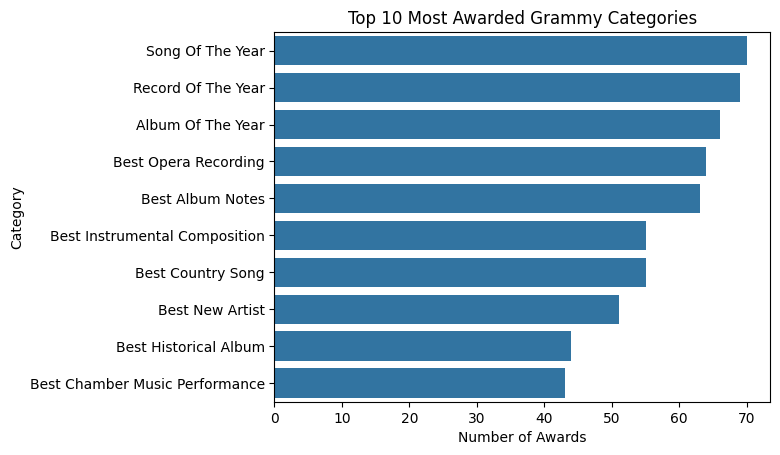

In [12]:
#Some visualizations
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Most Awarded Grammy Categories')
plt.xlabel('Number of Awards')
plt.ylabel('Category')
plt.show()


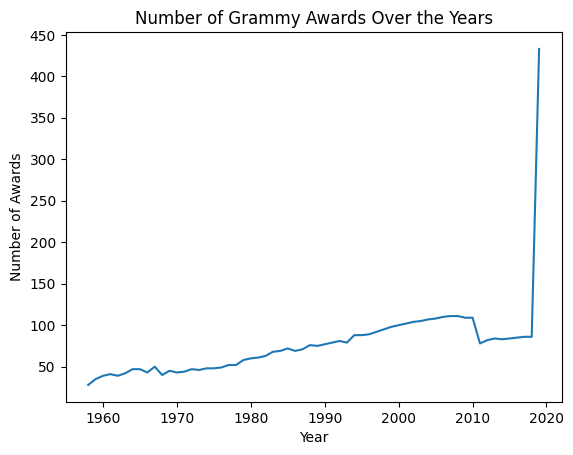

In [16]:
awards_per_year = grammy_df['year'].value_counts().sort_index()

plt.plot(awards_per_year.index, awards_per_year.values)
plt.title('Number of Grammy Awards Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Awards')
plt.show()

In [15]:
top_nominees = grammy_df['nominee'].value_counts().head(10)
top_artists = grammy_df[grammy_df['winner'] == True]['artist'].value_counts().head(10)

print("Top Nominees:\n", top_nominees)
print("Top Winning Artists:\n", top_artists)



Top Nominees:
 nominee
Bridge Over Troubled Water     7
Robert Woods                   7
Berlioz: Requiem               7
Steven Epstein                 7
David Frost                    6
A Taste Of Honey               6
Up, Up And Away                6
Britten: War Requiem           6
Mahler: Symphony No. 9 In D    5
Blackstar                      5
Name: count, dtype: int64
Top Winning Artists:
 artist
(Various Artists)    66
U2                   18
Aretha Franklin      16
Bruce Springsteen    13
Ella Fitzgerald      13
Stevie Wonder        13
Beyoncé              13
Ray Charles          12
Dixie Chicks         12
Tony Bennett         12
Name: count, dtype: int64
